In [1]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load dataset
data = fetch_20newsgroups(subset='all', categories=['sci.space', 'comp.graphics'])
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Text preprocessing and vectorisation
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train the classifier
classifier = MultinomialNB()
classifier.fit(X_train_vec, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test_vec)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

C:\Users\23388\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Accuracy: 0.9863945578231292
Confusion Matrix:
 [[287   5]
 [  3 293]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       292
           1       0.98      0.99      0.99       296

    accuracy                           0.99       588
   macro avg       0.99      0.99      0.99       588
weighted avg       0.99      0.99      0.99       588



In [2]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

# Load dataset
data = fetch_20newsgroups(subset='all', categories=['sci.space', 'comp.graphics'])
X, y = data.data, data.target

# Define classifiers to evaluate
classifiers = {
    "Multinomial Naive Bayes": MultinomialNB(),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier()
}

# Define the k-fold cross-validator (k=10)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Iterate over classifiers
for name, classifier in classifiers.items():
    pipeline = make_pipeline(TfidfVectorizer(stop_words='english'), classifier)
    scores = cross_val_score(pipeline, X, y, cv=kfold, scoring='accuracy')
    print(f"{name}:")
    print("Cross-validation scores:", scores)
    print("Average accuracy:", np.mean(scores))
    print()

Multinomial Naive Bayes:
Cross-validation scores: [0.98979592 0.98469388 0.97959184 0.96938776 0.96428571 0.97959184
 0.97959184 0.98469388 0.97959184 0.98979592]
Average accuracy: 0.9801020408163266

Support Vector Machine:
Cross-validation scores: [0.99489796 0.99489796 0.97959184 0.9744898  0.9744898  0.9744898
 0.98979592 0.97959184 0.97959184 0.98979592]
Average accuracy: 0.9831632653061225

Random Forest:
Cross-validation scores: [0.9744898  0.97959184 0.96428571 0.95918367 0.93877551 0.94387755
 0.95408163 0.96938776 0.96938776 0.9744898 ]
Average accuracy: 0.9627551020408165



In [3]:
# Example test set of questions and correct answers
test_set = [
    {"question": "What is the capital of France?", "correct_answer": "Paris"},
    {"question": "Who wrote Macbeth?", "correct_answer": "William Shakespeare"},
    # Add more questions and answers here
]

# Function to get answer from your QA system
def get_answer(question):
    # This function should be replaced with the actual method to get an answer from your QA system
    return "Dummy Answer"  # Placeholder

# Evaluate the QA system
correct_count = 0
for item in test_set:
    system_answer = get_answer(item["question"])
    if system_answer.strip().lower() == item["correct_answer"].lower():
        correct_count += 1

# Calculate and print accuracy
accuracy = correct_count / len(test_set)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.00


In [14]:
import numpy as np
from scipy.stats import kruskal
import scikit_posthocs as sp

# Example accuracies from 10-fold cross-validation for 3 classifiers
acc_classifier_1 = np.array([0.7, 0.7, 0.7, 0.9, 0.9, 0.9, 0.8, 0.9, 0.9, 0.8])
acc_classifier_2 = np.array([0.4, 0.4, 0.4, 0.4, 0.5, 0.2, 0.3, 0.2, 0.5, 0.4])
acc_classifier_3 = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

# Kruskal-Wallis test
stat, p = kruskal(acc_classifier_1, acc_classifier_2, acc_classifier_3)
print("Kruskal-Wallis test results: H =", stat, ", p-value =", p)

# Post-hoc analysis if Kruskal-Wallis test is significant
if p < 0.05:
    # Combine the groups for post-hoc analysis
    all_accuracies = np.concatenate([acc_classifier_1, acc_classifier_2, acc_classifier_3])
    groups = ['classifier_1'] * len(acc_classifier_1) + ['classifier_2'] * len(acc_classifier_2) + ['classifier_3'] * len(acc_classifier_3)

    # Post-hoc pairwise comparisons using Dunn's test
    dunn_test_results = sp.posthoc_dunn([acc_classifier_1, acc_classifier_2, acc_classifier_3], p_adjust='holm')
    print("Dunn's test post-hoc pairwise comparisons:\n", dunn_test_results)

Kruskal-Wallis test results: H = 27.083819752509932 , p-value = 1.314689717756897e-06
Dunn's test post-hoc pairwise comparisons:
               1         2             3
1  1.000000e+00  0.018531  5.844653e-07
2  1.853065e-02  1.000000  1.853065e-02
3  5.844653e-07  0.018531  1.000000e+00


LogisticRegression()

In [35]:
import numpy as np
from scipy.stats import kruskal
import scikit_posthocs as sp
import matplotlib.pyplot as plt

# Vectorize the training set using the same vectorizer
X_train_vectors = vectorizer.transform(X_train)

# Predict on the training set
y_train_pred = classifier.predict(X_train_vectors)

# Kruskal-Wallis test
stat, p = kruskal(y_train, y_train_pred)
print(f"Kruskal-Wallis test results: H = {stat}, p-value = {p}")

# Visualization: Boxplot of true vs predicted labels
plt.figure(figsize=(8, 6))
plt.boxplot([y_train, y_train_pred], labels=["Actual Labels", "Predicted Labels"])
plt.title("Distribution of Actual and Predicted Labels")
plt.ylabel("Label")
plt.show()

# Post-hoc analysis if Kruskal-Wallis test is significant
if p < 0.05:
    # Combine the groups for post-hoc analysis
    combined_labels = np.concatenate([y_train, y_train_pred])
    group_names = ['Actual'] * len(y_train) + ['Predicted'] * len(y_train_pred)

    # Post-hoc pairwise comparisons using Dunn's test
    dunn_test_results = sp.posthoc_dunn([y_train, y_train_pred], p_adjust='holm')
    print("Dunn's test post-hoc pairwise comparisons:\n", dunn_test_results)

    # Visualization of Dunn's test results
    plt.figure(figsize=(8, 6))
    plt.bar(["Actual vs Predicted"], [dunn_test_results[0][1]], color='skyblue')
    plt.title("Dunn's Test Comparison")
    plt.ylabel("p-value")
    plt.axhline(y=0.05, color='red', linestyle='--', label="Significance Threshold (0.05)")
    plt.legend()
    plt.show()

ValueError: X has 322 features, but MultinomialNB is expecting 164 features as input.

In [37]:
from sklearn.metrics import precision_recall_fscore_support

# Split the data into training and testing sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# Vectorize the new training and testing sets
X_train_new_vec = vectorizer.fit_transform(X_train_new)
X_test_new_vec = vectorizer.transform(X_test_new)

# Train the classifier on the new training set
classifier.fit(X_train_new_vec, y_train_new)

# Predict on the new test set
y_test_new_pred = classifier.predict(X_test_new_vec)

# Evaluate the classifier on the new test set
precision_new, recall_new, f1_score_new, support_new = precision_recall_fscore_support(y_test_new, y_test_new_pred, average='weighted')

print(f"New Precision: {precision_new}")
print(f"New Recall: {recall_new}")
print(f"New F1 Score: {f1_score_new}")
print(f"New Support: {support_new}")

New Precision: 0.4518796992481203
New Recall: 0.4857142857142857
New F1 Score: 0.4112698412698413
New Support: None


C:\Users\23388\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


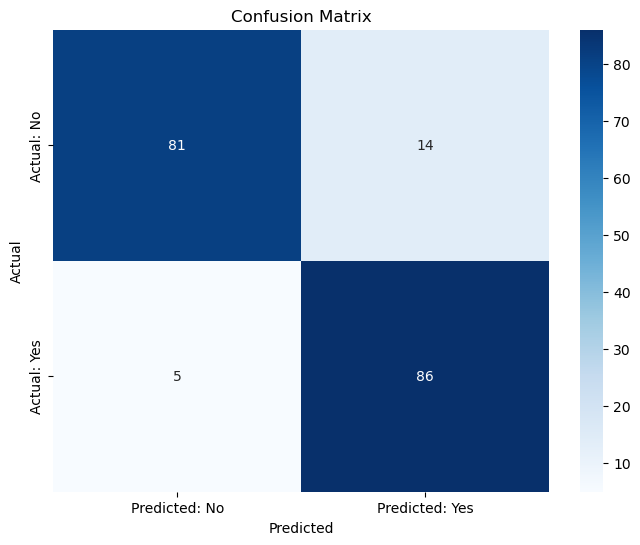

In [58]:
import seaborn as sns
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# Define the confusion matrix
confusion_matrix = np.array([[81, 14], [5, 86]])

# Create a DataFrame for the confusion matrix
df_cm = pd.DataFrame(confusion_matrix, index=['Actual: No', 'Actual: Yes'], columns=['Predicted: No', 'Predicted: Yes'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [54]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(classifier, X_train_vectors, y_train, cv=10)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", np.mean(cv_scores))

Cross-validation scores: [0.33333333 0.33333333 0.5        0.5        0.54545455 0.54545455
 0.45454545 0.54545455 0.54545455 0.54545455]
Average cross-validation score: 0.48484848484848475


C:\Users\23388\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


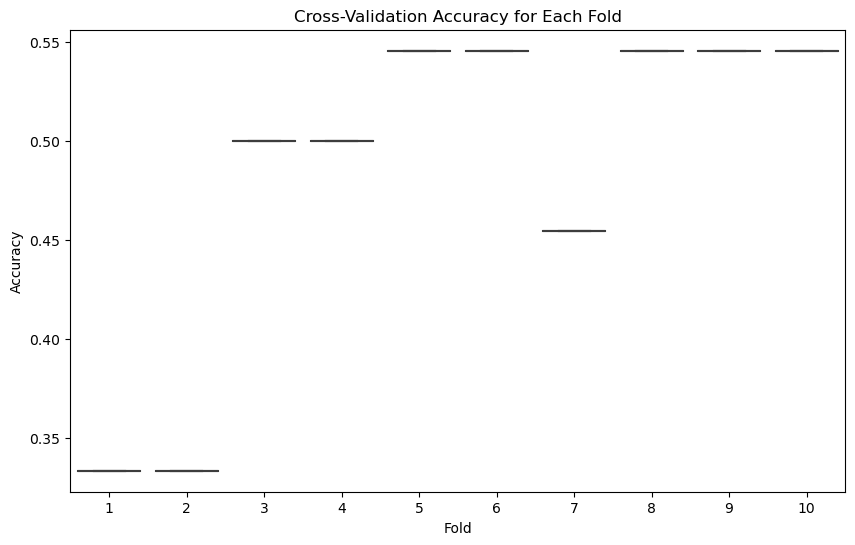

In [55]:
import seaborn as sns

import matplotlib.pyplot as plt

# Convert cross-validation scores to a DataFrame
cv_scores_df = pd.DataFrame({
    'Fold': range(1, len(cv_scores) + 1),
    'Accuracy': cv_scores
})

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fold', y='Accuracy', data=cv_scores_df)

# Add title and labels
plt.title('Cross-Validation Accuracy for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Accuracy')

# Show the plot
plt.show()

In [38]:
print("Sample vectorized data:\n", X_train_vectors[:5].toarray())


Sample vectorized data:
 [[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


In [39]:
print("Sample true labels:", y_train[:10])
print("Sample predicted labels:", y_train_pred[:10])


Sample true labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Sample predicted labels: [0 0 0 1 0 0 0 0 0 0]


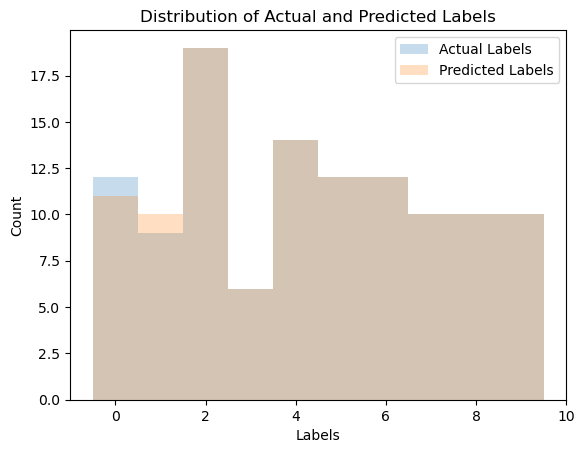

In [40]:
plt.hist(y_train, bins=np.arange(len(set(y_train)) + 1) - 0.5, alpha=0.25, label="Actual Labels")
plt.hist(y_train_pred, bins=np.arange(len(set(y_train_pred)) + 1) - 0.5, alpha=0.25, label="Predicted Labels")
plt.xlabel("Labels")
plt.ylabel("Count")
plt.title("Distribution of Actual and Predicted Labels")
plt.legend()
plt.show()

Cross-validation scores: [0.41666667 0.5        0.66666667 0.75       0.63636364 0.81818182
 0.54545455 0.63636364 0.72727273 0.72727273]
Average cross-validation score: 0.6424242424242423


C:\Users\23388\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


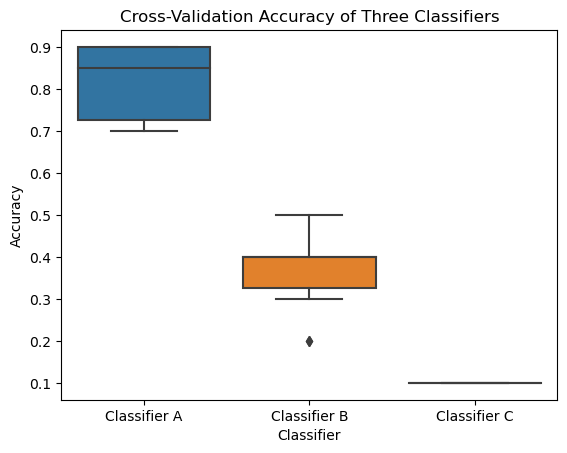

In [29]:
import pandas as pd
from sklearn.model_selection import cross_val_score

# Artificial data for three classifiers
data = {
    "Classifier A": acc_classifier_1,  # 10-fold CV scores
    "Classifier B": acc_classifier_2,
    "Classifier C": acc_classifier_3  # Use acc_classifier_3 instead of classifier
}
# Perform 10-fold cross-validation
cv_scores = cross_val_score(classifier, X_train_vectors, y_train, cv=10)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", np.mean(cv_scores))

# Convert data to a Pandas DataFrame
df = pd.DataFrame(data)

# Long format for Seaborn
df_long = pd.melt(df, var_name='Classifier', value_name='Accuracy')

# Create the boxplot
sns.boxplot(x='Classifier', y='Accuracy', data=df_long)

# Add title and labels
plt.title('Cross-Validation Accuracy of Three Classifiers')
plt.ylabel('Accuracy')
plt.xlabel('Classifier')

# Show the plot
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score

# Artificial data for three classifiers
data = {
    "Classifier A": acc_classifier_1,  # 10-fold CV scores
    "Classifier B": acc_classifier_2,
    "Classifier C": acc_classifier_3  # Use acc_classifier_3 instead of classifier
}
# Perform 10-fold cross-validation
cv_scores = cross_val_score(classifier, X_train_vectors, y_train, cv=10)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", np.mean(cv_scores))

# Convert data to a Pandas DataFrame
df = pd.DataFrame(data)

# Long format for Seaborn
df_long = pd.melt(df, var_name='Classifier', value_name='Accuracy')

# Create the boxplot
sns.boxplot(x='Classifier', y='Accuracy', data=df_long)

# Add title and labels
plt.title('Cross-Validation Accuracy of Three Classifiers')
plt.ylabel('Accuracy')
plt.xlabel('Classifier')

# Show the plot
plt.show()

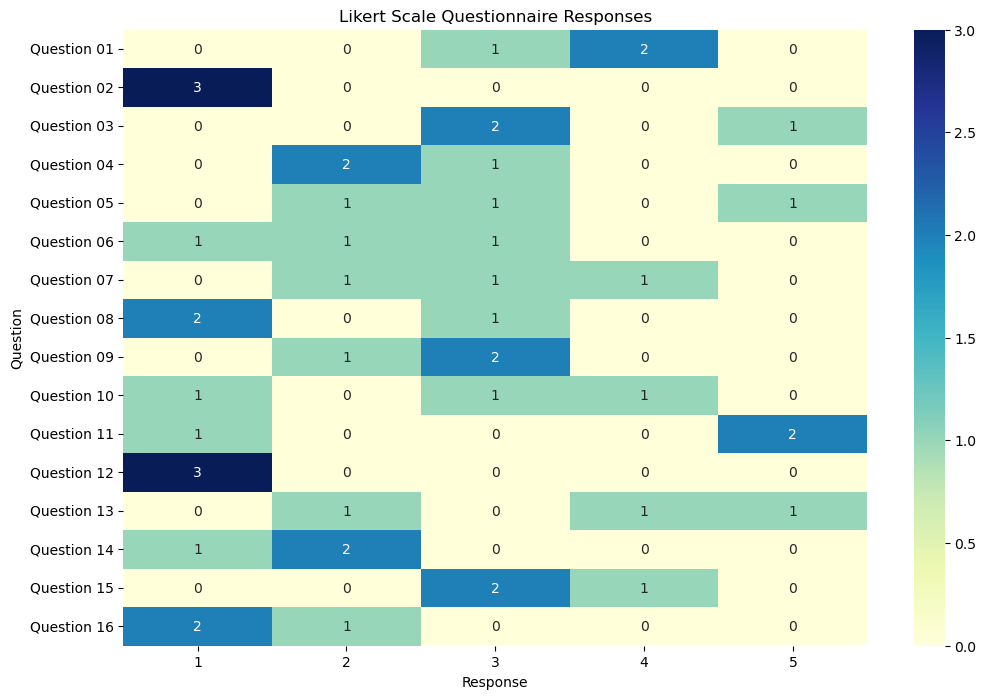

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data with responses from three participants for 16 questions
data = {
    'Question 01': [4, 4, 3],
    'Question 02': [1, 1, 1],
    'Question 03': [3, 3, 5],
    'Question 04': [3, 2, 2],
    'Question 05': [2, 5, 3],
    'Question 06': [2, 1, 3],
    'Question 07': [3, 4, 2],
    'Question 08': [1, 3, 1],
    'Question 09': [2, 3, 3],
    'Question 10': [3, 4, 1],
    'Question 11': [5, 5, 1],
    'Question 12': [1, 1, 1],
    'Question 13': [2, 4, 5],
    'Question 14': [2, 2, 1],
    'Question 15': [3, 3, 4],
    'Question 16': [2, 1, 1]
}

df = pd.DataFrame(data)

# Convert DataFrame to long format for easier plotting
df_long = df.melt(var_name='Question', value_name='Response')

# Create a pivot table for the heatmap
response_pivot = df_long.pivot_table(index='Question', columns='Response', aggfunc=len, fill_value=0)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(response_pivot, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Likert Scale Questionnaire Responses")
plt.ylabel("Question")
plt.xlabel("Response")
plt.show()


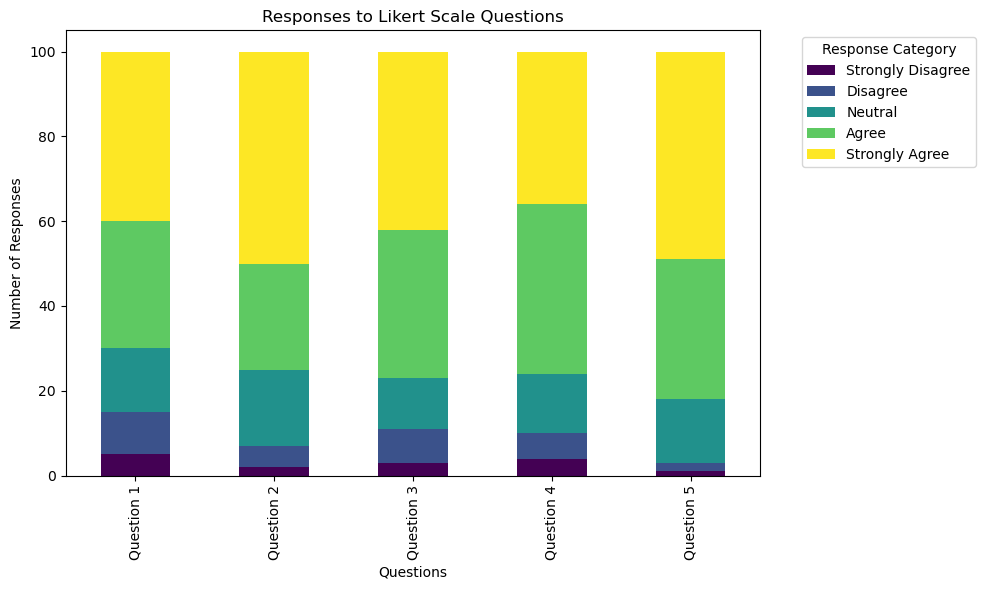

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data: Responses to 5 questions on a Likert scale from 1 to 5
data = {
    'Strongly Disagree': [5, 2, 3, 4, 1],
    'Disagree': [10, 5, 8, 6, 2],
    'Neutral': [15, 18, 12, 14, 15],
    'Agree': [30, 25, 35, 40, 33],
    'Strongly Agree': [40, 50, 42, 36, 49]
}

# Create a DataFrame with the given data and questions as index
df = pd.DataFrame(data, index=[f'Question {i+1}' for i in range(5)])

# Plotting the data as a stacked bar chart
df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Adding title and labels
plt.title('Responses to Likert Scale Questions')
plt.xlabel('Questions')
plt.ylabel('Number of Responses')
plt.legend(title='Response Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


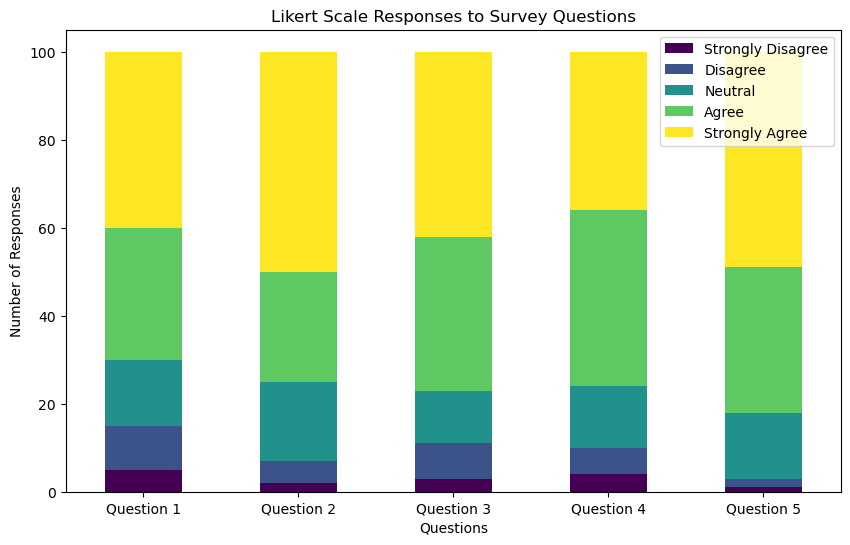

In [11]:
# Create a stacked bar chart
ax = df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Adding labels and title
plt.xlabel('Questions')
plt.ylabel('Number of Responses')
plt.title('Likert Scale Responses to Survey Questions')
plt.xticks(rotation=0)

# Display the chart
plt.show()